In [13]:
## LIBRARIES
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

In [14]:
## Input/Output
IMPORT_FOLDER = "C:\\Users\\E2884\\Desktop\\WPy64-3980\\notebooks\\ENL_Script_analyse_magasin\\data\\"
FILE = "20231003_ZMM_EDT_ART_02.xlsx"

In [15]:
DATE_EXTRACTION = FILE[0:8]
YEAR_EXTRACTION = DATE_EXTRACTION[0:4]
MONTH_EXTRACTION = DATE_EXTRACTION[4:6]
DAY_EXTRACTION = DATE_EXTRACTION[6:8]

In [16]:
## Import data from xls to pandas
df_DATA = pd.read_excel(IMPORT_FOLDER + FILE, sheet_name='Sheet1')

In [17]:
## Rename and list columns
df_DATA.rename(columns = {'N°Article':'CODE_ARTICLE',
                          'Désignation':'DESIGNATION',
                          'Emplacement':'EMPLACEMENT',
                          'Dernière sortie':'DERNIERE_SORTIE',
                          'Stock Valo Global':'QUANTITE',
                          'DIV. Point de Cmd':'QTE_MIN',
                          'DIV. Stock max':'QTE_MAX',
                          'T.sup':'TSUP',
                          'Dernière entrée':'DERNIERE_ENTREE',
                          'Dernier comptage':'DERNIER_INVENTAIRE',
                          'Dernière conso.':'DERNIERE_CONSO',
                          'Prix moy. pondéré':'PRIX_MOY_POND',
                          'Dernier mouv.':'DERNIER_MOUVEMENT',
                          'Val Stock Valo Global':'VALEUR'}, inplace = True)
for el in df_DATA.columns.to_list():
    print(el)
df_DATA['VALEUR'] = df_DATA['VALEUR']*100

CODE_ARTICLE
DESIGNATION
Div
PJ
Mag
Typ Article
EMPLACEMENT
Gp marchandise
Gp achet.
QTE_MIN
QTE_MAX
DIV. Stock Sécurité
TyP
MG. util. libre
Unité
MG. point de Cmd
MG. Qté de réapro
Stock Valo Mag
Val Stock Valo Mag
MAG appro ext
Qté Cmd
TSUP
DERNIER_INVENTAIRE
DERNIERE_ENTREE
DERNIERE_SORTIE
DERNIERE_CONSO
DERNIER_MOUVEMENT
Domaine de valo.
Groupe de valo.
QUANTITE
VALEUR
PRIX_MOY_POND
critiques
Groupe de types de poste
Reservation
Code ABC
Gestion par lots
Temps de réception
Délai prévu de livraison


In [18]:
## BASE ARTICLE
NOMBRE_ARTICLE = df_DATA['CODE_ARTICLE'].count()
NOMBRE_ARTICLE_TSUP = df_DATA[df_DATA.TSUP == 'X']['CODE_ARTICLE'].count()
NOMBRE_ARTICLE_QNULL = df_DATA[(df_DATA.TSUP != "X") & (df_DATA.QUANTITE == 0)]['CODE_ARTICLE'].count()
NOMBRE_ARTICLE_UTIL = NOMBRE_ARTICLE - NOMBRE_ARTICLE_TSUP - NOMBRE_ARTICLE_QNULL

PCT_ARTICLE_TSUP = round((NOMBRE_ARTICLE_TSUP/NOMBRE_ARTICLE)*100,2)
PCT_ARTICLE_QNULL = round((NOMBRE_ARTICLE_QNULL/NOMBRE_ARTICLE)*100,2)
PCT_ARTICLE_UTIL = round((NOMBRE_ARTICLE_UTIL/NOMBRE_ARTICLE)*100,2)

print("BASE ARTICLE")
print("")
print("{:<35} --> {:<7}".format("Nombre d'articles",NOMBRE_ARTICLE))
print("{:<35} --> {:<7}  {:<6}%".format("Nombre d'articles en TSUP",NOMBRE_ARTICLE_TSUP,PCT_ARTICLE_TSUP))
print("{:<35} --> {:<7}  {:<6}%".format("Nombre d'articles a qté nulle",NOMBRE_ARTICLE_QNULL,PCT_ARTICLE_QNULL))
print("{:<35} --> {:<7}  {:<6}%".format("Nombre d'articles utilisé",NOMBRE_ARTICLE_UTIL,PCT_ARTICLE_UTIL))

# Df articles utilisés
df_DATA_UTIL = df_DATA[(df_DATA.TSUP != "X") & (df_DATA.QUANTITE != 0)]


NOMBRE_ARTICLE_VNULL = df_DATA_UTIL[(df_DATA_UTIL.QUANTITE != 0) & (df_DATA_UTIL.VALEUR == 0)]['CODE_ARTICLE'].count()
PCT_ARTICLE_VNULL = round((NOMBRE_ARTICLE_VNULL/NOMBRE_ARTICLE_UTIL)*100,2)
PCT_ARTICLE_VNULL_T = round((NOMBRE_ARTICLE_VNULL/NOMBRE_ARTICLE)*100,2)

print("")
print("{:<35} --> {:<7}  {:<6}%   {:<6}%".format("Nombre d'articles valo nulle",NOMBRE_ARTICLE_VNULL,PCT_ARTICLE_VNULL_T, PCT_ARTICLE_VNULL))

# Emplacements
NOMBRE_EMPLACEMENT = df_DATA_UTIL['EMPLACEMENT'].nunique()
print("")
print("{:<35} --> {:<7}".format("Nombre d'emplacements",NOMBRE_EMPLACEMENT))


# Catégorie emplacement
dict_EMPL_CONFORME = {"ADEFINIR":"NON_CONFORME",
                      "BACA":"BACA\d{4}",
                      "BACB":"BACB\d{4}",
                      "CHIMIE":"CHIMIE",
                      "CLIM":"CLIM(?:(\d{4}\S|SOL))",
                      "ENCOMMANDE":"ENCOMMANDE",
                      "FUEL":"FUEL",
                      "EXTDROIT":"EXTDROIT",
                      "EXTGAUCHE":"EXTGAUCHE",
                      "GP":"GP\S\d{4}\S",
                      "HUILERIE":"HUILERIE",
                      "LABO":"LABO",
                      "MT":"MT\S{4}",
                      "MTBAC" :"MTBAC\d{2}",
                      "MZ":"MZ\S\d{4}\S",
                      "PP":"PP\S\d{4}\S",
                      "PPBAC":"PP\S\d\SBAC",
                      "PPMUR":"PPMUR\d{2}",
                      "PPRECEPT":"PPRECEPT",
                      "PR":"PR\S\d{4}\S",
                     }

df_DATA['EMPLACEMENT'] = df_DATA['EMPLACEMENT'].fillna("VIDE")

list_EMPL_CONFORME = []
list_EMPL_NN_CONFORME = []
for emp in df_DATA['EMPLACEMENT']:
    conformite = "NON_CONFORME"
    for key, value in dict_EMPL_CONFORME.items():
        tmp = re.findall(value, emp)
        if tmp != []:
            conformite = key
        else:
            pass
    list_EMPL_CONFORME.append(conformite)


df_DATA['EMPLACEMENT_CONFORME']=list_EMPL_CONFORME
df_DATA_UTIL = df_DATA[(df_DATA.TSUP != "X") & (df_DATA.QUANTITE != 0)]

NOMBRE_ARTICLE_EMPL_NN_CONFORME = df_DATA_UTIL[df_DATA_UTIL.EMPLACEMENT_CONFORME == "NON_CONFORME"]['CODE_ARTICLE'].count()
PCT_NOMBRE_ARTICLE_EMPL_NN_CONFORME = round((NOMBRE_ARTICLE_EMPL_NN_CONFORME/NOMBRE_ARTICLE_UTIL)*100,2)

NOMBRE_ARTICLE_SANS_EMPL = df_DATA_UTIL[df_DATA_UTIL.EMPLACEMENT == "VIDE"]['CODE_ARTICLE'].count()
PCT_NOMBRE_ARTICLE_SS_EMPL = round((NOMBRE_ARTICLE_SANS_EMPL/NOMBRE_ARTICLE_UTIL)*100,2)

NOMBRE_ARTICLE_EN_COMMANDE = df_DATA_UTIL[df_DATA_UTIL.EMPLACEMENT == "ENCOMMANDE"]['CODE_ARTICLE'].count()
PCT_NOMBRE_ARTICLE_EN_COMMANDE = round((NOMBRE_ARTICLE_EN_COMMANDE/NOMBRE_ARTICLE_UTIL)*100,2)

print("{:<35} --> {:<7}  {:<6}%".format("Nb article emplacement non conforme",NOMBRE_ARTICLE_EMPL_NN_CONFORME,PCT_NOMBRE_ARTICLE_EMPL_NN_CONFORME))
print("{:<35} --> {:<7}  {:<6}%".format("Nb article sans emplacement",NOMBRE_ARTICLE_SANS_EMPL,PCT_NOMBRE_ARTICLE_SS_EMPL))
print("{:<35} --> {:<7}  {:<6}%".format("Nb article emplacement ENCOMMANDE",NOMBRE_ARTICLE_EN_COMMANDE,PCT_NOMBRE_ARTICLE_EN_COMMANDE))
print('\n')

print('Articles avec emplacement non conforme et sans emplacement:')
print(df_DATA_UTIL[df_DATA_UTIL.EMPLACEMENT_CONFORME == "NON_CONFORME"][['CODE_ARTICLE','DESIGNATION','EMPLACEMENT']])

BASE ARTICLE

Nombre d'articles                   --> 12913  
Nombre d'articles en TSUP           --> 3806     29.47 %
Nombre d'articles a qté nulle       --> 4060     31.44 %
Nombre d'articles utilisé           --> 5047     39.08 %

Nombre d'articles valo nulle        --> 531      4.11  %   10.52 %

Nombre d'emplacements               --> 2424   
Nb article emplacement non conforme --> 15       0.3   %
Nb article sans emplacement         --> 5        0.1   %
Nb article emplacement ENCOMMANDE   --> 9        0.18  %


Articles avec emplacement non conforme et sans emplacement:
       CODE_ARTICLE                              DESIGNATION EMPLACEMENT
649      1100049109                      GRAISSEUR (ITEM 36)     PPD220N
871      1100165004        **SUPPRIME** COURROIE VENTILATEUR   CADENASSE
3513     1500010023                 ACCOUPLEMENT COTE MOTEUR        VIDE
3530     1500020014           JOINT TORIQUE DE PLATEAU VANNE     BAC0204
4273     1501030003                    ROULEMENT MOT

In [19]:
## VALORISATION
VALORISATION_TOTAL = round(df_DATA_UTIL['VALEUR'].sum(),2)
VALORISATION_COAL = round(df_DATA_UTIL[df_DATA_UTIL.CODE_ARTICLE == 1000000099]['VALEUR'].sum(),2)
PCT_VALORISATION_COAL = round((VALORISATION_COAL/VALORISATION_TOTAL)*100,2)
VALORISATION_SS_COAL = round(df_DATA_UTIL[df_DATA_UTIL.CODE_ARTICLE != 1000000099]['VALEUR'].sum(),2)
PCT_VALORISATION_SS_COAL = round((VALORISATION_SS_COAL/VALORISATION_TOTAL)*100,2)

print("VALORISATION")
print("")
print("{:<35} --> {:<7}".format("Valorisation globale",VALORISATION_TOTAL))
print("{:<35} --> {:<7}  {:<6}%".format("Valorisation charbon",VALORISATION_COAL,PCT_VALORISATION_COAL))
print("{:<35} --> {:<7}  {:<6}%".format("Valorisation hors charbon",VALORISATION_SS_COAL,PCT_VALORISATION_SS_COAL))


## CATEGORIE PARETO
# Valorisation par catégorie A-B-C
pc_cata = 80
pc_catb = 15
pc_catc = 5

df_DATA_ss_charbon = df_DATA_UTIL[df_DATA_UTIL.CODE_ARTICLE != 1000000099]
df_DATA_ss_charbon = df_DATA_ss_charbon.sort_values('VALEUR', ascending=False)

df_DATA_ss_charbon['PCT_VALEUR'] = df_DATA_ss_charbon['VALEUR']/VALORISATION_SS_COAL # Ajout d'une colonne % valorisation par rapport à la valorisation totale
df_DATA_ss_charbon['CUMSUM_PCT_VALEUR'] = df_DATA_ss_charbon['PCT_VALEUR'].cumsum() # Ajout d'une colonne somme cumulée du % valorisation par rapport à la valorisation totale


conditions = [
    (df_DATA_ss_charbon['CUMSUM_PCT_VALEUR'] <= pc_cata/100),
    (df_DATA_ss_charbon['CUMSUM_PCT_VALEUR'] > pc_cata/100) & (df_DATA_ss_charbon['CUMSUM_PCT_VALEUR'] <= (pc_catb+pc_cata)/100),
    (df_DATA_ss_charbon['CUMSUM_PCT_VALEUR'] > (pc_catb+pc_cata)/100)
    ]
values = ['CATA', 'CATB', 'CATC']
df_DATA_ss_charbon['PARETO'] = np.select(conditions, values)

print("")
df_DATA_gb_pareto = df_DATA_ss_charbon.groupby('PARETO').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"})
df_DATA_gb_pareto['PCT_CODE_ARTICLE'] = round(df_DATA_gb_pareto['CODE_ARTICLE']*100/NOMBRE_ARTICLE_UTIL,2)
print(df_DATA_gb_pareto[['CODE_ARTICLE','PCT_CODE_ARTICLE','VALEUR_XPF']])

# Valorisation macro emplacement
print("")
df_DATA_gb_macro_empl = df_DATA_ss_charbon.groupby('EMPLACEMENT_CONFORME').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"}).sort_values('VALEUR_XPF',ascending=False)
df_DATA_gb_macro_empl['VALEUR_MOY'] = round(df_DATA_gb_macro_empl['VALEUR_XPF']/df_DATA_gb_macro_empl['CODE_ARTICLE'],2)
df_DATA_gb_macro_empl['PCT_MACRO_EMPL'] = round(df_DATA_gb_macro_empl['VALEUR_XPF']*100/VALORISATION_SS_COAL,2)
df_DATA_gb_macro_empl['PCT_MACRO_EMPL_CUMSUM'] = round(df_DATA_gb_macro_empl['PCT_MACRO_EMPL'].cumsum(),2)

print(df_DATA_gb_macro_empl)


VALORISATION

Valorisation globale                --> 241132379300
Valorisation charbon                --> 77159171900  32.0  %
Valorisation hors charbon           --> 163973207400  68.0  %

        CODE_ARTICLE  PCT_CODE_ARTICLE    VALEUR_XPF
PARETO                                              
CATA             874             17.32  131172191400
CATB            1179             23.36   24594614800
CATC            2993             59.30    8206401200

                      CODE_ARTICLE   VALEUR_XPF    VALEUR_MOY  PCT_MACRO_EMPL  \
EMPLACEMENT_CONFORME                                                            
GP                             768  61583759500  8.018719e+07           37.56   
PP                            1814  29084211000  1.603319e+07           17.74   
MZ                             970  21729226500  2.240126e+07           13.25   
PR                             801  15913684900  1.986727e+07            9.71   
EXTDROIT                        39  15768979800  4.043328

(0.0, 101.0)

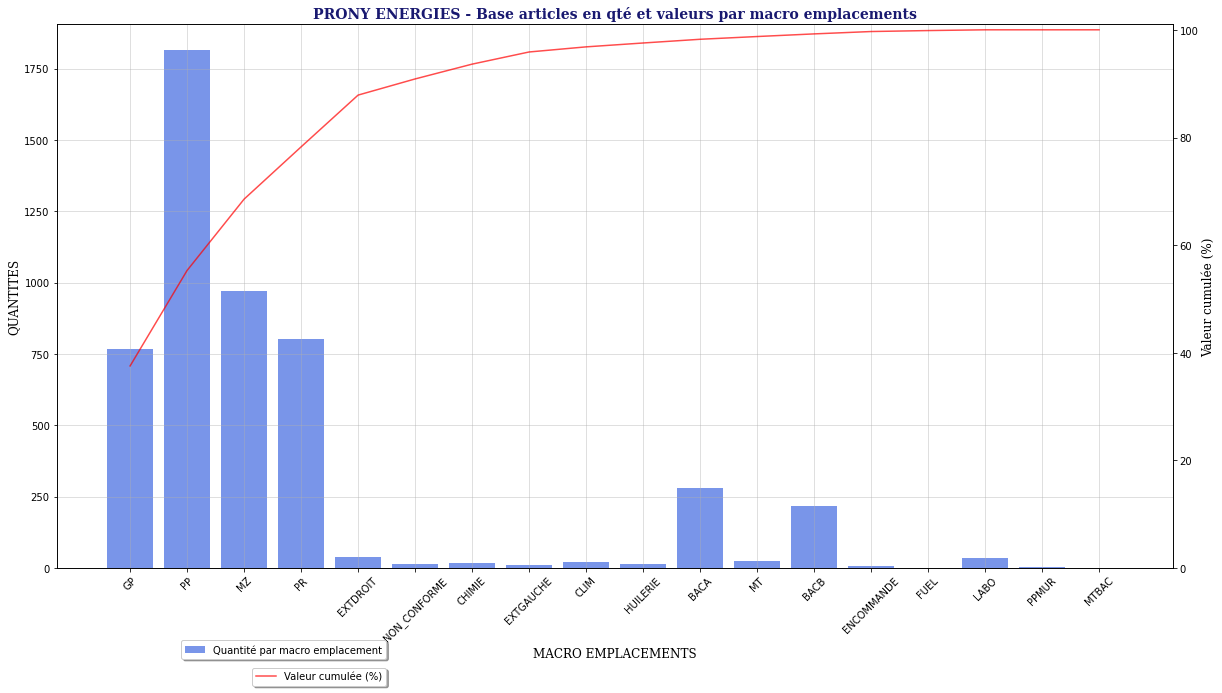

In [20]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Base articles en qté et valeurs par macro emplacements"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "MACRO EMPLACEMENTS"
xtick_rotation = 45

y_label = "QUANTITES"
y2_label = "VALEUR (%)"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Quantité par macro emplacement'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (%)'

graph_linestyle = 'solid'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'
# text_color = 'black'
# text_weight = 'light'
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_DATA_gb_macro_empl.index.values, df_DATA_gb_macro_empl.CODE_ARTICLE, color=y1_color, alpha = y1_alpha, label=y1_label)

axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe2.plot(df_DATA_gb_macro_empl.index.values, df_DATA_gb_macro_empl.PCT_MACRO_EMPL_CUMSUM, color = y2_color, linestyle=graph_linestyle, alpha = y2_alpha, label=y2_label)

axe2.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
axe2.set_ylim(0,101)

In [21]:
## DA AUTOMATIQUE
NOMBRE_ARTICLE_V1 = df_DATA[(df_DATA.TSUP != "X") & (df_DATA.TyP == 'V1')]['CODE_ARTICLE'].count()
df_DATA_V1 = df_DATA[(df_DATA.TSUP != "X") & (df_DATA.TyP == 'V1') & (df_DATA.EMPLACEMENT_CONFORME != 'ENCOMMANDE')]

conditions = [
    (df_DATA_V1['QUANTITE'] <= df_DATA_V1['QTE_MIN']),
    (df_DATA_V1['QUANTITE'] > df_DATA_V1['QTE_MIN']) & (df_DATA_V1['QUANTITE'] <= df_DATA_V1['QTE_MAX']),
    (df_DATA_V1['QUANTITE'] > df_DATA_V1['QTE_MAX'])
    ]
values = ['A COMMANDER', 'EN STOCK', 'SURSTOCK']
df_DATA_V1['STATUS'] = np.select(conditions, values)

df_DATA_V1_ACOMMANDER = df_DATA_V1[df_DATA_V1['STATUS'] == "A COMMANDER"]
df_DATA_V1_ACOMMANDER['VALEUR_A_COMMANDER'] = (df_DATA_V1_ACOMMANDER['QTE_MAX'] - df_DATA_V1_ACOMMANDER['QUANTITE'])*df_DATA_V1_ACOMMANDER['PRIX_MOY_POND']*100

df_DATA_V1_SURSTOCK = df_DATA_V1[df_DATA_V1['STATUS'] == "SURSTOCK"]
df_DATA_V1_SURSTOCK['VALEUR_SURSTOCK'] = (df_DATA_V1_SURSTOCK['QUANTITE'] - df_DATA_V1_SURSTOCK['QTE_MAX'])*df_DATA_V1_SURSTOCK['PRIX_MOY_POND']*100


NOMBRE_ARTICLE_ACOMMANDER = df_DATA_V1[df_DATA_V1['STATUS'] == 'A COMMANDER']['CODE_ARTICLE'].count()
NOMBRE_ARTICLE_SURSTOCK = df_DATA_V1[df_DATA_V1['STATUS'] == 'SURSTOCK']['CODE_ARTICLE'].count()
VALEUR_ACOMMANDER = df_DATA_V1_ACOMMANDER['VALEUR_A_COMMANDER'].sum()
VALEUR_SURSTOCK = df_DATA_V1_SURSTOCK['VALEUR_SURSTOCK'].sum()

print("DA AUTOMATIQUE")
print("")
print("{:<35} --> {:<7}".format("Nombre d'article en V1",NOMBRE_ARTICLE_V1))
print("{:<35} --> {:<7}".format("Nombre d'article à commander",NOMBRE_ARTICLE_ACOMMANDER))
print("{:<35} --> {:<7}".format("Valeur à commander (XPF)",VALEUR_ACOMMANDER))
print("{:<35} --> {:<7}".format("Nombre d'article en sur stock",NOMBRE_ARTICLE_SURSTOCK))
print("{:<35} --> {:<7}".format("Valeur surstock (XPF)",VALEUR_SURSTOCK))

DA AUTOMATIQUE

Nombre d'article en V1              --> 0      
Nombre d'article à commander        --> 0      
Valeur à commander (XPF)            --> 0.0    
Nombre d'article en sur stock       --> 0      
Valeur surstock (XPF)               --> 0.0    


In [23]:
## INVENTAIRE
df_DATA_INV = df_DATA_ss_charbon[(df_DATA_ss_charbon.TSUP != "X") & (df_DATA_ss_charbon.QUANTITE != 0)]
DATE_INV_EXERCICE = '2023-07-01'
DATE_DERNIER_INV = df_DATA_INV['DERNIER_INVENTAIRE'].max().strftime('%Y-%m-%d')


conditions = [
    (df_DATA_INV['DERNIER_INVENTAIRE'] <= DATE_INV_EXERCICE ),
    (df_DATA_INV['DERNIER_INVENTAIRE'] > DATE_INV_EXERCICE)
    ]
values = ['NON','OUI']

df_DATA_INV['STATUS_INV'] = np.select(conditions, values)


NOMBRE_ARTICLE_A_INVENTORIER = df_DATA_INV['CODE_ARTICLE'].count()
NOMBRE_ARTICLE_INVENTORIE = df_DATA_INV[df_DATA_INV.STATUS_INV == 'OUI']['CODE_ARTICLE'].count()
PCT_ARTICLE_INVENTORIE = round(NOMBRE_ARTICLE_INVENTORIE*100/NOMBRE_ARTICLE_A_INVENTORIER,2)
NOMBRE_ARTICLE_JAMAIS_INVENTORIE = df_DATA_INV[df_DATA_INV.STATUS_INV == '0']['CODE_ARTICLE'].count()
PCT_ARTICLE_JAMAIS_INVENTORIE = round(NOMBRE_ARTICLE_JAMAIS_INVENTORIE*100/NOMBRE_ARTICLE_A_INVENTORIER,2)
print("INVENTAIRE")
print("")
print("{:<35} --> {:<7}".format("Nombre d'article à inventorier", NOMBRE_ARTICLE_A_INVENTORIER))
print("{:<35} --> {:<7}   {:<7}%".format("Nombre d'article inventorié", NOMBRE_ARTICLE_INVENTORIE,PCT_ARTICLE_INVENTORIE))
print("{:<35} --> {:<7}   {:<7}%".format("Nombre d'article jamais inventorié", NOMBRE_ARTICLE_JAMAIS_INVENTORIE,PCT_ARTICLE_JAMAIS_INVENTORIE))


df_DATA_INV_OUI = df_DATA_INV[df_DATA_INV['STATUS_INV'] == 'OUI']
df_DATA_INV_NON = df_DATA_INV[(df_DATA_INV.STATUS_INV == "NON") | (df_DATA_INV.STATUS_INV == '0')]

df_DATA_INV_gb_mempl = df_DATA_INV.groupby('EMPLACEMENT_CONFORME').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"}).sort_values('VALEUR_XPF',ascending=False)
df_DATA_INV_OUI_gb_mempl = df_DATA_INV_OUI.groupby('EMPLACEMENT_CONFORME').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"}).sort_values('VALEUR_XPF',ascending=False)
df_DATA_INV_NON_gb_mempl = df_DATA_INV_NON.groupby('EMPLACEMENT_CONFORME').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"}).sort_values('VALEUR_XPF',ascending=False)


INVENTAIRE

Nombre d'article à inventorier      --> 5046   
Nombre d'article inventorié         --> 0         0.0    %
Nombre d'article jamais inventorié  --> 145       2.87   %


C:\Users\E2884\AppData\Local\Temp/ipykernel_15164/82926457.py:61: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axe1.bar(df_DATA_INV_OUI_gb_mempl.index.values, df_DATA_INV_OUI_gb_mempl.CODE_ARTICLE, color=y2_color, alpha = y2_alpha, label=y2_label)


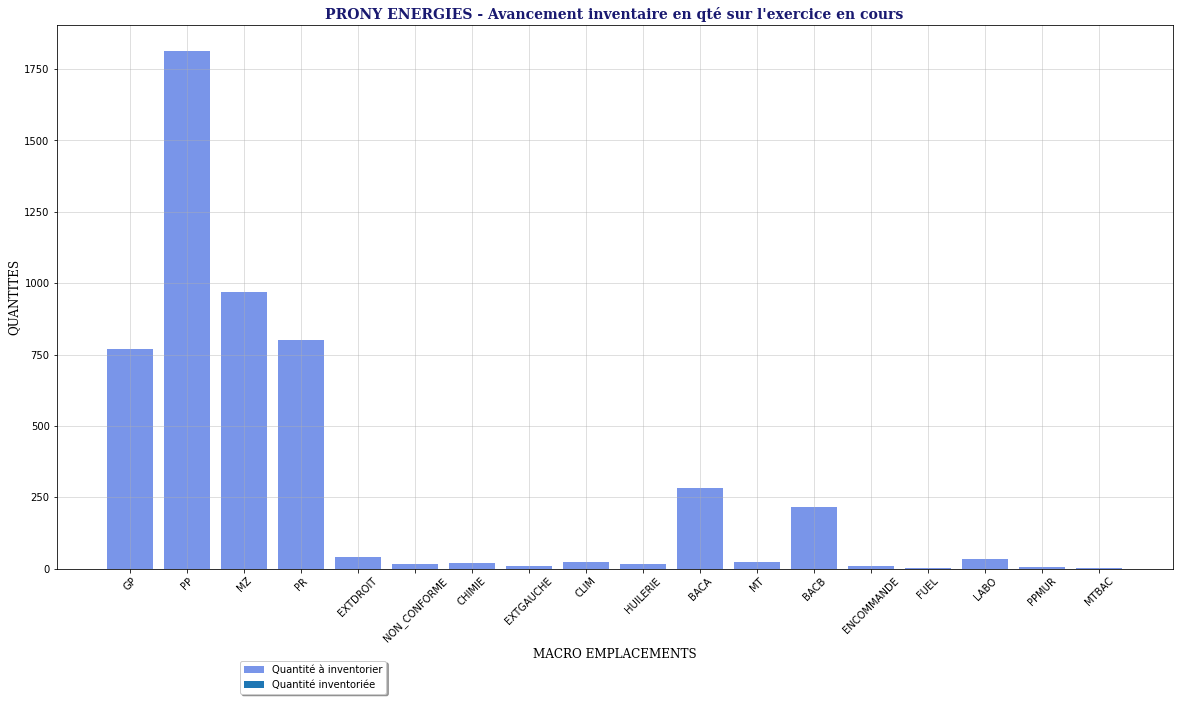

In [24]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Avancement inventaire en qté sur l'exercice en cours"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "MACRO EMPLACEMENTS"
xtick_rotation = 45

y_label = "QUANTITES"
# y2_label = "XPF"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Quantité à inventorier'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Quantité inventoriée'

# graph_linestyle = 'solid'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'
# text_color = 'black'
# text_weight = 'light'
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_DATA_INV_gb_mempl.index.values, df_DATA_INV_gb_mempl.CODE_ARTICLE, color=y1_color, alpha = y1_alpha, label=y1_label)
axe1.bar(df_DATA_INV_OUI_gb_mempl.index.values, df_DATA_INV_OUI_gb_mempl.CODE_ARTICLE, color=y2_color, alpha = y2_alpha, label=y2_label)


axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)


C:\Users\E2884\AppData\Local\Temp/ipykernel_15164/1084414602.py:61: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  axe1.bar(df_DATA_INV_OUI_gb_mempl.index.values, df_DATA_INV_OUI_gb_mempl.VALEUR_XPF, color=y2_color, alpha = y2_alpha, label=y2_label)


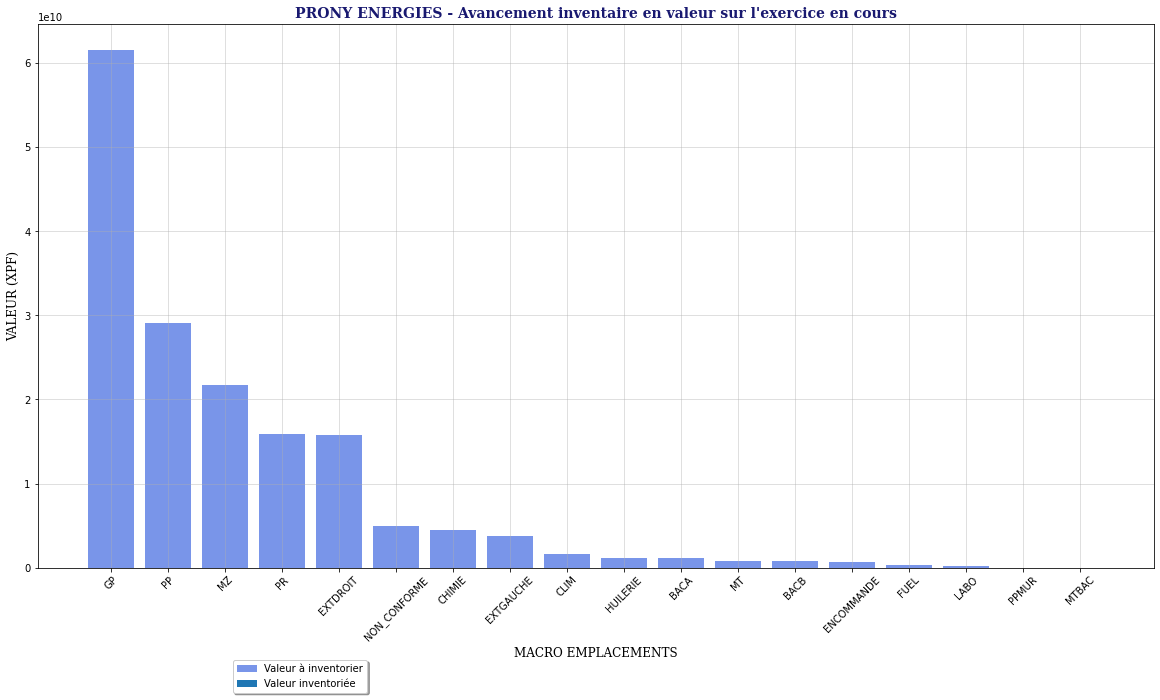

In [25]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Avancement inventaire en valeur sur l'exercice en cours"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "MACRO EMPLACEMENTS"
xtick_rotation = 45

y_label = "VALEUR (XPF)"
# y2_label = "XPF"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Valeur à inventorier'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur inventoriée'

# graph_linestyle = 'solid'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'
# text_color = 'black'
# text_weight = 'light'
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_DATA_INV_gb_mempl.index.values, df_DATA_INV_gb_mempl.VALEUR_XPF, color=y1_color, alpha = y1_alpha, label=y1_label)
axe1.bar(df_DATA_INV_OUI_gb_mempl.index.values, df_DATA_INV_OUI_gb_mempl.VALEUR_XPF, color=y2_color, alpha = y2_alpha, label=y2_label)

axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

In [26]:
## MOUVEMENTS
df_DATA_MOUV = df_DATA_ss_charbon[(df_DATA_ss_charbon.TSUP != "X") & (df_DATA_ss_charbon.QUANTITE != 0)]

# DERNIERE_SORTIE
df_DATA_MOUV['YM_DERNIERE_SORTIE'] = df_DATA_MOUV['DERNIERE_SORTIE'].dt.strftime('%Y-%m')
# df_DATA_MOUV['YM_DERNIERE_SORTIE'] = df_DATA_MOUV['YM_DERNIERE_SORTIE'].fillna('2099-01')
df_DATA_MOUV_gb_sortie = df_DATA_MOUV.groupby('YM_DERNIERE_SORTIE').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"})
df_DATA_MOUV_gb_sortie['CODE_ARTICLE_CUMSUM'] = df_DATA_MOUV_gb_sortie['CODE_ARTICLE'].cumsum()
df_DATA_MOUV_gb_sortie['VALEUR_CUMSUM'] = df_DATA_MOUV_gb_sortie['VALEUR_XPF'].cumsum()


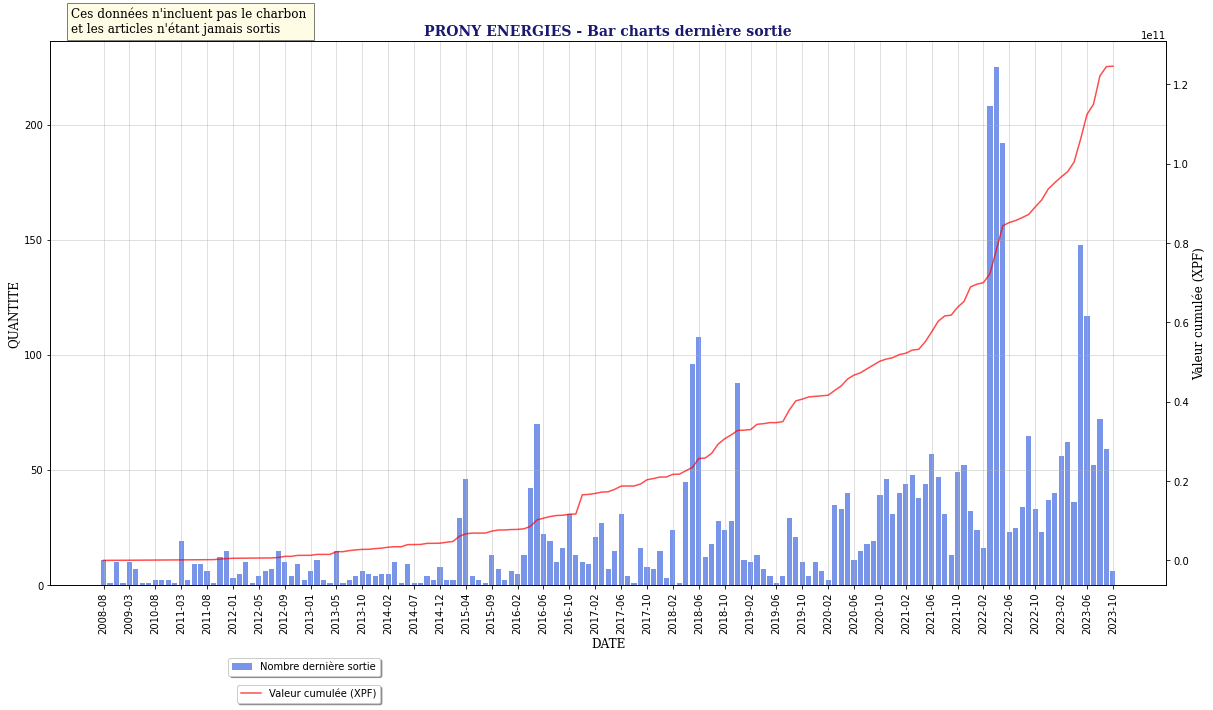

In [27]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Bar charts dernière sortie"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "DATE"
xtick_rotation = 90

y_label = "QUANTITE"
y2_label = "XPF" # Option

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Nombre dernière sortie'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (XPF)'

graph_linestyle = 'solid'

# Paramètres texte instructions
texte = "Ces données n'incluent pas le charbon \n\
et les articles n'étant jamais sortis"

text_x = -5
text_y = 240
text_family = 'serif'
text_color = 'black'
text_weight = 'light'
text_size = 12
bbox_facecolor = 'lemonchiffon'
bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################

fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Texte instructions
plt.text(-5, 240, texte,
         fontdict={'family': text_family,'color' : text_color,'weight': text_weight,'size': text_size},
         bbox = {'facecolor' : bbox_facecolor, 'alpha' : bbox_alpha})

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_DATA_MOUV_gb_sortie.index.values, df_DATA_MOUV_gb_sortie.CODE_ARTICLE, color= y1_color, alpha = y1_alpha, label=y1_label)

axe1.set_xticks(df_DATA_MOUV_gb_sortie.index.values[::4])
axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe2.plot(df_DATA_MOUV_gb_sortie.index.values, df_DATA_MOUV_gb_sortie.VALEUR_CUMSUM, color = y2_color, linestyle=graph_linestyle, alpha = y2_alpha, label=y2_label)

axe2.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)

In [28]:
# DERNIERE_ENTREE
df_DATA_MOUV['YM_DERNIERE_ENTREE'] = df_DATA_MOUV['DERNIERE_ENTREE'].dt.strftime('%Y-%m')
# df_DATA_MOUV['YM_DERNIERE_SORTIE'] = df_DATA_MOUV['YM_DERNIERE_SORTIE'].fillna('2099-01')
df_DATA_MOUV_gb_entree = df_DATA_MOUV.groupby('YM_DERNIERE_ENTREE').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"})
df_DATA_MOUV_gb_entree['CODE_ARTICLE_CUMSUM'] = df_DATA_MOUV_gb_sortie['CODE_ARTICLE'].cumsum()
df_DATA_MOUV_gb_entree['VALEUR_CUMSUM'] = df_DATA_MOUV_gb_sortie['VALEUR_XPF'].cumsum()

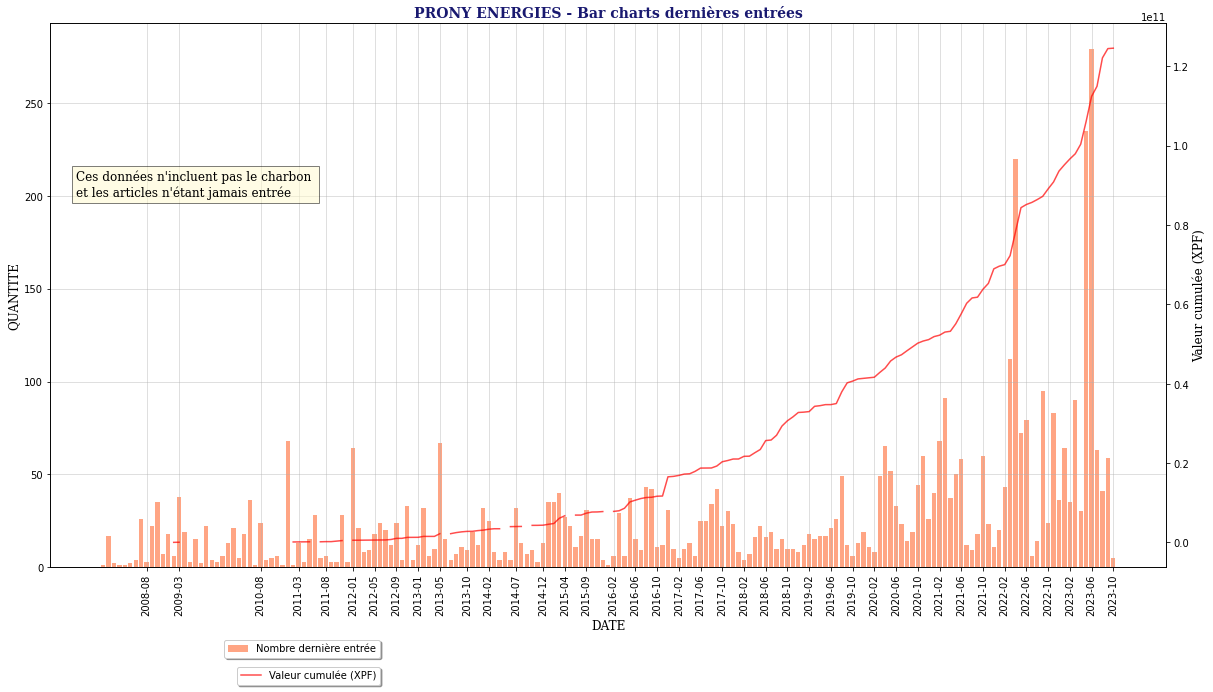

In [29]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Bar charts dernières entrées"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "DATE"
xtick_rotation = 90

y_label = "QUANTITE"
y2_label = "XPF" # Option

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'coral'
y1_alpha = 0.7
y1_label = 'Nombre dernière entrée'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (XPF)'

graph_linestyle = 'solid'

# Paramètres texte instructions
texte = "Ces données n'incluent pas le charbon \n\
et les articles n'étant jamais entrée"

text_x = -5
text_y = 200
text_family = 'serif'
text_color = 'black'
text_weight = 'light'
text_size = 12
bbox_facecolor = 'lemonchiffon'
bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################

fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Texte instructions
plt.text(text_x, text_y, texte,
         fontdict={'family': text_family,'color' : text_color,'weight': text_weight,'size': text_size},
         bbox = {'facecolor' : bbox_facecolor, 'alpha' : bbox_alpha})

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_DATA_MOUV_gb_entree.index.values, df_DATA_MOUV_gb_entree.CODE_ARTICLE, color= y1_color, alpha = y1_alpha, label=y1_label)

axe1.set_xticks(df_DATA_MOUV_gb_sortie.index.values[::4])
axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe2.plot(df_DATA_MOUV_gb_entree.index.values, df_DATA_MOUV_gb_entree.VALEUR_CUMSUM, color = y2_color, linestyle=graph_linestyle, alpha = y2_alpha, label=y2_label)

axe2.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)

In [30]:
# DERNIERE_MVT
df_DATA_MOUV['YM_DERNIERE_MOUVEMENT'] = df_DATA_MOUV['DERNIER_MOUVEMENT'].dt.strftime('%Y-%m')
# df_DATA_MOUV['YM_DERNIERE_SORTIE'] = df_DATA_MOUV['YM_DERNIERE_SORTIE'].fillna('2099-01')
df_DATA_MOUV_gb_mvt = df_DATA_MOUV.groupby('YM_DERNIERE_MOUVEMENT').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"})
df_DATA_MOUV_gb_mvt['CODE_ARTICLE_CUMSUM'] = df_DATA_MOUV_gb_sortie['CODE_ARTICLE'].cumsum()
df_DATA_MOUV_gb_mvt['VALEUR_CUMSUM'] = df_DATA_MOUV_gb_sortie['VALEUR_XPF'].cumsum()

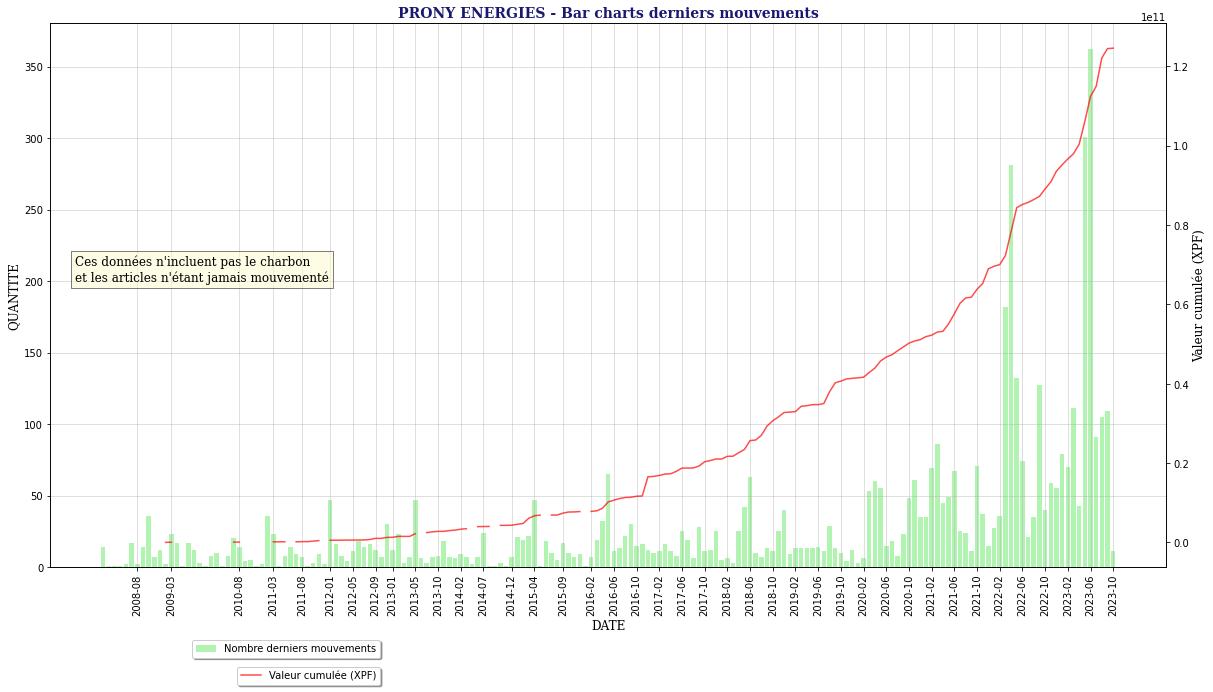

In [31]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Bar charts derniers mouvements"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "DATE"
xtick_rotation = 90

y_label = "QUANTITE"
y2_label = "XPF" # Option

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'lightgreen'
y1_alpha = 0.7
y1_label = 'Nombre derniers mouvements'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (XPF)'

graph_linestyle = 'solid'

# Paramètres texte instructions
texte = "Ces données n'incluent pas le charbon \n\
et les articles n'étant jamais mouvementé"

text_x = -5
text_y = 200
text_family = 'serif'
text_color = 'black'
text_weight = 'light'
text_size = 12
bbox_facecolor = 'lemonchiffon'
bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################

fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Texte instructions
plt.text(text_x, text_y, texte,
         fontdict={'family': text_family,'color' : text_color,'weight': text_weight,'size': text_size},
         bbox = {'facecolor' : bbox_facecolor, 'alpha' : bbox_alpha})

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_DATA_MOUV_gb_mvt.index.values, df_DATA_MOUV_gb_mvt.CODE_ARTICLE, color= y1_color, alpha = y1_alpha, label=y1_label)

axe1.set_xticks(df_DATA_MOUV_gb_sortie.index.values[::4])
axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe2.plot(df_DATA_MOUV_gb_mvt.index.values, df_DATA_MOUV_gb_mvt.VALEUR_CUMSUM, color = y2_color, linestyle=graph_linestyle, alpha = y2_alpha, label=y2_label)

axe2.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)

In [32]:
# DERNIERE_INVENTAIRE
df_DATA_MOUV['YM_DERNIERE_INVENTAIRE'] = df_DATA_MOUV['DERNIER_INVENTAIRE'].dt.strftime('%Y-%m')
# df_DATA_MOUV['YM_DERNIERE_SORTIE'] = df_DATA_MOUV['YM_DERNIERE_SORTIE'].fillna('2099-01')
df_DATA_MOUV_gb_inv = df_DATA_MOUV.groupby('YM_DERNIERE_INVENTAIRE').agg({'CODE_ARTICLE':'count','VALEUR':'sum'}).rename(columns={"VALEUR":"VALEUR_XPF"})
df_DATA_MOUV_gb_inv['CODE_ARTICLE_CUMSUM'] = df_DATA_MOUV_gb_sortie['CODE_ARTICLE'].cumsum()
df_DATA_MOUV_gb_inv['VALEUR_CUMSUM'] = df_DATA_MOUV_gb_sortie['VALEUR_XPF'].cumsum()

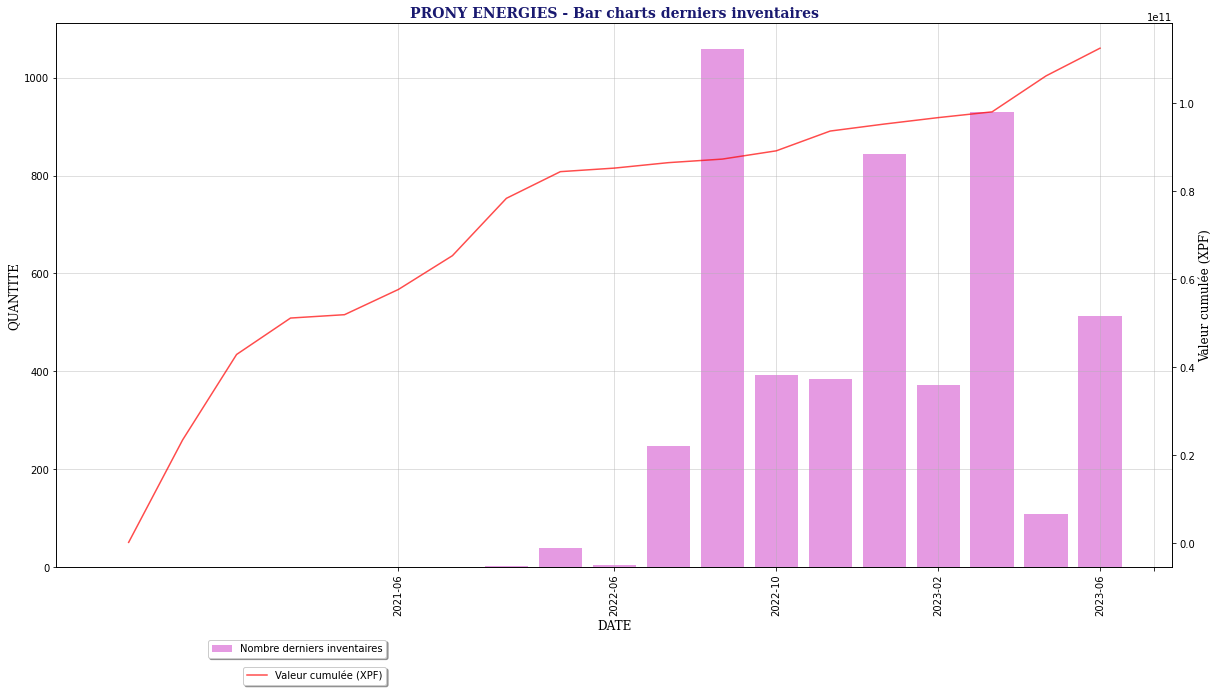

In [33]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Bar charts derniers inventaires"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "DATE"
xtick_rotation = 90

y_label = "QUANTITE"
y2_label = "XPF" # Option

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'orchid'
y1_alpha = 0.7
y1_label = 'Nombre derniers inventaires'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Valeur cumulée (XPF)'

graph_linestyle = 'solid'

# Paramètres texte instructions
texte = "Ces données n'incluent pas le charbon \n\
et les articles n'étant jamais mouvementé"

text_x = -5
text_y = 200
text_family = 'serif'
text_color = 'black'
text_weight = 'light'
text_size = 12
bbox_facecolor = 'lemonchiffon'
bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################

fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# # Texte instructions
# plt.text(text_x, text_y, texte,
#          fontdict={'family': text_family,'color' : text_color,'weight': text_weight,'size': text_size},
#          bbox = {'facecolor' : bbox_facecolor, 'alpha' : bbox_alpha})

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_DATA_MOUV_gb_inv.index.values, df_DATA_MOUV_gb_inv.CODE_ARTICLE, color= y1_color, alpha = y1_alpha, label=y1_label)

axe1.set_xticks(df_DATA_MOUV_gb_sortie.index.values[::4])
axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)

# Axe n°2
axe2 = axe1.twinx()
axe2.set_ylabel(y2_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe2.plot(df_DATA_MOUV_gb_inv.index.values, df_DATA_MOUV_gb_inv.VALEUR_CUMSUM, color = y2_color, linestyle=graph_linestyle, alpha = y2_alpha, label=y2_label)

axe2.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)